In [1]:
%load_ext autoreload
%autoreload 2
import SepVector
from fwix import CudaOperator
from fwix import CudaWEM
from pyVector import superVector
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt


/home/users/arustam/miniconda3/envs/fwix/lib/python3.11/site-packages/numpy/_core/getlimits.py:558: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/users/arustam/miniconda3/envs/fwix/lib/python3.11/site-packages/numpy/_core/getlimits.py:90: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/users/arustam/miniconda3/envs/fwix/lib/python3.11/site-packages/numpy/_core/getlimits.py:558: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/users/arustam/miniconda3/envs/fwix/lib/python3.11/site-packages/numpy/_core/getlimits.py:90: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


In [66]:
import pyarrow as pa
import pyarrow.dataset as ds
import pyarrow.compute as pc
import pyarrow.parquet as pq

In [126]:
DATA_PATH = f'{os.getenv("GROUP_SCRATCH")}/data/marimba_for_fwix_subsample_100-10/'
dataset = ds.dataset(DATA_PATH, format="parquet")

In [127]:
geom = dataset.to_table(columns=['uniquerecid', 
                                 'sx_rot', 'sy_rot', 'sz', 
                                 'rx_rot', 'ry_rot', 'rz',
                                ])

In [128]:
geom

pyarrow.Table
uniquerecid: int32
sx_rot: double
sy_rot: double
sz: double
rx_rot: double
ry_rot: double
rz: double
----
uniquerecid: [[2352,2352,2352,2352,2352,...,3068,3068,3068,3068,3068],[3155,3155,3155,3155,3155,...,3875,3875,3875,3875,3875],...,[8837,8837,8837,8837,8837,...,9612,9612,9612,9612,9612],[9694,9694,9694,9694,9694,...,10506,10506,10506,10506,10506]]
sx_rot: [[6497,6497,6497,6497,6497,...,6498.4220000000005,6498.423,6498.424,6498.424,6498.425],[6497,6497,6497,6497,6497,...,6498.381,6498.381,6498.3820000000005,6498.3820000000005,6498.384],...,[6499.374,6499.377,6499.379,6499.3820000000005,6499.383,...,6500.977,6500.978,6500.978,6500.979,6500.979],[6499.923,6499.925,6499.928,6499.932,6499.939,...,6501,6501,6501,6501,6501]]
sy_rot: [[3742.408,3742.5840000000003,3742.933,3743.022,3743.632,...,3744.978,3744.889,3744.628,3744.802,3744.539],[3742.408,3742.5840000000003,3742.933,3743.022,3743.632,...,3742.0840000000003,3742.262,3742.1730000000002,3743.573,3743.486],...,[3741.706

In [129]:
pc.max(geom['rz'])

<pyarrow.DoubleScalar: 0.671>

In [96]:
sx = geom['sx_rot'].to_numpy()
sy = geom['sy_rot'].to_numpy()

rx = geom['rx_rot'].to_numpy()
ry = geom['ry_rot'].to_numpy()
rz = geom['rz'].to_numpy()

In [100]:
vel = genericIO.defaultIO.getVector('/home/groups/biondo/arustam/marimba/Vel/marimba_velocity.H')

In [106]:
ax = vel.getHyper().axes
ax

[n=280	o=0.000000	d=0.025000,
 n=370	o=3735.875000	d=0.025000,
 n=170	o=6496.875000	d=0.025000]

In [121]:
ymin = ax[2].o
ymax = ax[2].o + (ax[2].n-1)*ax[2].d

xmin = ax[1].o
xmax = ax[1].o + (ax[1].n-1)*ax[1].d

extent = (ymin, ymax, xmin, xmax)
extent

(6496.875, 6501.100000062957, 3735.875, 3745.100000137463)

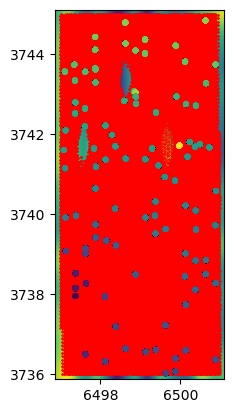

In [122]:
plt.imshow(vel[..., 100], extent=extent)
plt.scatter(sx[:], sy[:], c='red', s=.1)
plt.scatter(rx[:], ry[:], c=rz, s=10)


In [86]:
pc.min(geom['rz'])

<pyarrow.DoubleScalar: 0.035>

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
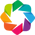

In [67]:
import holoviews as hv 
hv.extension('bokeh')
hv.output(widget_location='bottom')

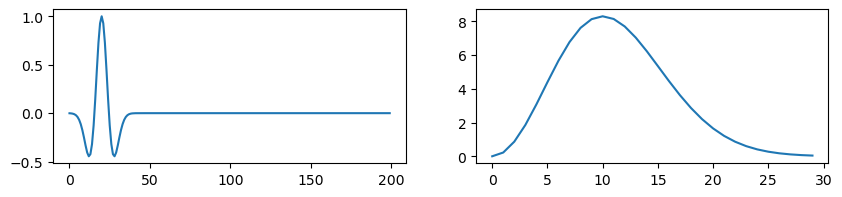

In [3]:
def ricker_wavelet(frequency, Nt, dt, t0=0):
    t = np.linspace(0, (Nt-1)*dt, Nt)
    t_shifted = t - t0
    ricker = (1 - 2 * (np.pi ** 2) * (frequency ** 2) * (t_shifted ** 2)) * np.exp(-(np.pi ** 2) * (frequency ** 2) * (t_shifted ** 2))
    return ricker

# Parameters
frequency = 5  # Ricker wavelet central frequency
Nt = 200    # Length of the wavelet in seconds
dt = 0.01      # Time sampling interval
t0 = 0.2

# Generate Ricker wavelet
wavelet = ricker_wavelet(frequency, Nt, dt, t0=t0)
W = np.fft.fft(wavelet)

dfreq = 1/(Nt*dt)
of = 0.1
maxf = 30.
nf = int((maxf-of) / dfreq)

nf = 30
nz = 50

f, a = plt.subplots(1,2, figsize=[10,2])
a[0].plot(wavelet, label='Ricker Wavelet')
a[1].plot(np.abs(W[int(of/dfreq):nf]), label="Spectrue")

In [4]:
nf

30

In [5]:
nx = 100
dx = 0.01
ny = 100
dy = 0.01
dz = 0.01

ns = 30;
ds = 1
nworkers = 10

nxrec = nx
nyrec = ny

slow = SepVector.getSepVector(ns=[nx,ny,nf,nz], ds=[dx, dy, dfreq, dz], os=[0,   0,   of,  0], storage='dataComplex')
# constant
slow[:] = 1.
# add a layer
slow[nz-5:,...] = 2.

# 4 corners
# slow[:,:,:100,:100] = 1/1**2
# slow[:,:,:100,100:] = 1/2**2
# slow[:,:,100:,:100] = 1/3**2
# slow[:,:,100:,100:] = 1/4**2

# add attenuation in the borders
npml = 20
amax = 1e-1
pml = 1j * np.linspace(0,amax,npml) 

# slow[:,:,:npml,:] += -pml[::-1, np.newaxis] 
# slow[:,:,-npml:,:] += -pml[:, np.newaxis]
# slow[:,:,:,:npml] += -pml[::-1]
# slow[:,:,:,-npml:] += -pml

den = slow.clone()
den.set(1)

model = superVector(slow, den)

wfld = SepVector.getSepVector(ns=[nx,ny,nf,ns],ds=[dx,dy,dfreq,ds],os=[0,0,of,0], storage='dataComplex')

n_src_traces = ns
src_traces = SepVector.getSepVector(ns=[nf, n_src_traces],ds=[dfreq, 1],os=[1, 0], storage='dataComplex')
n_rec_traces = nxrec * nyrec * ns
rec_traces = SepVector.getSepVector(ns=[nf, n_rec_traces],ds=[dfreq, 1],os=[1, 0], storage='dataComplex')

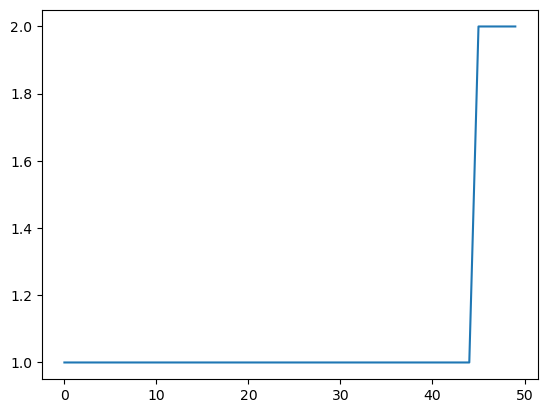

In [6]:
plt.plot(slow[:,0,0,0].real)

In [7]:
n_rec_traces

300000

In [8]:
sx = np.linspace(0, (nx-1)*dx, n_src_traces).astype(np.float32) 
sy = np.linspace(0, (ny-1)*dy, n_src_traces).astype(np.float32) 
sz = np.linspace(0, (nz-1)*dz, n_src_traces).astype(np.float32) * 0 + dz
s_ids = np.linspace(0, ns-1, ns).astype(int)

rx, ry = np.meshgrid(np.linspace(0, (nx-1)*dx, nxrec), np.linspace(0, (ny-1)*dy, nyrec))
r_ids = s_ids.repeat(rx.size)
rx = np.tile(rx.flatten(), ns)
ry = np.tile(ry.flatten(), ns)
rz = np.zeros(rx.size) + (nz-1)*dz*0

In [9]:
s_ids

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [10]:
rx.size

300000

In [11]:
import genericIO
import os 

nbatches = [1, 2]
look = 2

par = {
    "nref" : 3,
    "eps" : 0.04,
    "taperx" : 0,
    "tapery" : 0,
    "padx" : 0,
    "pady" : 0,
    "ref_look_ahead" : look,
    "compress_error" : 1e-6,
    "wflds_to_store" : 4,
    "wfld_path" : os.environ["SCRATCH"],
}
prop_par = genericIO.pythonParams(par)

geometry = {
    "sx" : sx, "sy" : sy, "sz" : sz, "s_ids" : s_ids.astype(np.int32),
    "rx" : rx, "ry" : ry, "rz" : rz, "r_ids" : r_ids.astype(np.int32),
}

In [12]:
src_traces

complexVector
Axis 1: n=30	o=1.000000	d=0.500000
Axis 2: n=30	o=0.000000	d=1.000000

In [13]:
len(geometry['sx'])

30

In [14]:
for i in range(n_src_traces):
    src_traces[i, :] = W[:nf]

In [15]:
norm = rec_traces.norm()

In [16]:
import pandas as pd

wavelets = [None] * ns
wavelets = [SepVector.getSepVector(ns=[nf], ds=[dfreq],os=[of], storage='dataComplex') for i in range(ns)]
for i in range(ns):
    wavelets[i][:] = W[:nf]
    
wavelet_df = pd.DataFrame({
            'uniqueshots': s_ids.tolist(),
            'data': wavelets # Convert 2D array to list of 1D arrays
        })

In [17]:
import dask_util
from dask.distributed import LocalCluster

# cluster = LocalCluster(n_workers=2)
# client = cluster.get_client()
client = dask_util.load('/home/groups/biondo/arustam/marimba/client.dask')
client.getClient().restart()



TimeoutError: 9/10 nanny worker(s) did not shut down within 720s: {'tcp://10.19.18.16:38619', 'tcp://10.19.14.13:46862', 'tcp://10.19.14.7:41727', 'tcp://10.19.14.7:32857', 'tcp://10.19.14.13:42359', 'tcp://10.19.17.1:44426', 'tcp://10.19.14.9:46462', 'tcp://10.19.14.11:35340', 'tcp://10.19.14.7:38040'}

In [18]:
wavelet_df

uniqueshots                                               data
0             0  complexVector\nAxis 1: n=30\to=0.100000\td=0.5...
1             1  complexVector\nAxis 1: n=30\to=0.100000\td=0.5...
2             2  complexVector\nAxis 1: n=30\to=0.100000\td=0.5...
3             3  complexVector\nAxis 1: n=30\to=0.100000\td=0.5...
4             4  complexVector\nAxis 1: n=30\to=0.100000\td=0.5...
5             5  complexVector\nAxis 1: n=30\to=0.100000\td=0.5...
6             6  complexVector\nAxis 1: n=30\to=0.100000\td=0.5...
7             7  complexVector\nAxis 1: n=30\to=0.100000\td=0.5...
8             8  complexVector\nAxis 1: n=30\to=0.100000\td=0.5...
9             9  complexVector\nAxis 1: n=30\to=0.100000\td=0.5...
10           10  complexVector\nAxis 1: n=30\to=0.100000\td=0.5...
11           11  complexVector\nAxis 1: n=30\to=0.100000\td=0.5...
12           12  complexVector\nAxis 1: n=30\to=0.100000\td=0.5...
13           13  complexVector\nAxis 1: n=30\to=0.100000\td=0.5...
14           14  complexVector\nAxis 1: n=30\to=0.100000\td=0.5...
15           15  complexVector\nAxis 1: n=30\to=0.100000\td=0.5...
16           16  complexVector\nAxis 1: n=30\to=0.100000\td=0.5...
17           17  complexVector\nAxis 1: n=30\to=0.100000\td=0.5...
18           18  complexVector\nAxis 1: n=30\to=0.100000\td=0.5...
19           19  complexVector\nAxis 1: n=30\to=0.100000\td=0.5...
20           20  complexVector\nAxis 1: n=30\to=0.100000\td=0.5...
21           21  complexVector\nAxis 1: n=30\to=0.100000\td=0.5...
22           22  complexVector\nAxis 1: n=30\to=0.100000\td=0.5...
23           23  complexVector\nAxis 1: n=30\to=0.100000\td=0.5...
24           24  complexVector\nAxis 1: n=30\to=0.100000\td=0.5...
25           25  complexVector\nAxis 1: n=30\to=0.100000\td=0.5...
26           26  complexVector\nAxis 1: n=30\to=0.100000\td=0.5...
27           27  complexVector\nAxis 1: n=30\to=0.100000\td=0.5...
28           28  complexVector\nAxis 1: n=30\to=0.100000\td=0.5...
29           29  complexVector\nAxis 1: n=30\to=0.100000\td=0.5...

In [19]:
import zarr

# zarr.config.set({
#     'async.concurrency': 1,      # Limit concurrent async operations
#     'threading.max_workers': 1,  # Limit Zarr's internal thread pool
# })

In [20]:
import pysep3d
from fwix import FWIXmodeling
import dask

pipe = pysep3d.DaskPipeline([
    FWIXmodeling.FWIXmodeling(model, wavelet_df, prop_par, geometry,
                        partition_size=int(ns/nworkers), shots_per_gpu=int(ns/nworkers), gpu_stream_batches=nbatches),
    pysep3d.ComplexToFloat(col='data'),
    pysep3d.PyArrowWriter(os.environ["SCRATCH"] + '/test/tmp')
])

# pipe.execute()

In [21]:
data_loader = pysep3d.DaskPipeline([
    pysep3d.PyArrowReader(os.environ["SCRATCH"] + '/test/tmp'),
    # pysep3d.FilterByValues('uniqueshots', keep_values=[0, 1]),
    pysep3d.FloatToComplex(col='data')
])

In [22]:
# res = data_loader.execute()

In [23]:
from scipy.ndimage import gaussian_filter
grad_mask = model.clone().set(1.)

grad_mask[0][:10, ...] = 0
grad_mask[1][:10, ...] = 0

grad_mask[0][:] = gaussian_filter(grad_mask[0][:], sigma=3)
grad_mask[1][:] = gaussian_filter(grad_mask[1][:], sigma=3)

In [24]:
slow.shape

(50, 30, 100, 100)

In [25]:
from fwix.utils import sepvector_to_zarr

temp_dir = os.environ['SCRATCH'] + '/tmp/'

shards = (25,nf,ny,nx)
# shards = None
chunks = (25,10,ny,nx)

bg = sepvector_to_zarr(slow, 
                       os.environ['SCRATCH'] + '/tmp/bg.zarr', temp_dir=temp_dir, 
                       remove_file=False, chunks=chunks)
bg.set(1.)
# # cannot clone here as cloning is temporary
den = sepvector_to_zarr(slow, os.environ['SCRATCH'] + '/tmp/den.zarr', temp_dir=temp_dir, 
                        remove_file=False, chunks=chunks)
den.set(1.)

# temporary vector
g = bg.clone()
g[:] = grad_mask[0][:]

In [26]:
bg.remove_file

False

In [27]:
bg.norm()

3872.9833984375

In [28]:
g.isDifferent(bg)

True

In [29]:
import pickle

bt = pickle.dumps(bg)
bgg = pickle.loads(bt)

In [30]:
bgg.remove_file

False

In [31]:
bg.norm()

3872.9833984375

In [32]:
# zarr.config.set({
#     'async.concurrency': 1,      # Limit concurrent async operations
#     'threading.max_workers': 1,  # Limit Zarr's internal thread pool
# })

In [33]:
from fwix import FWIXProblem

pFWIX = FWIXProblem.FWIXProblem(
    bg, den,
    data_loader, 
    par,
    wavelet_df,
    problem_par = {
        "grad_mask" : superVector(g,g),
    },
    shots_per_gpu=int(ns/nworkers),
    gpu_stream_batches=nbatches,
    retry_tasks = 1
)

--- Pipeline Execution Started ---
Initial Dask DataFrame created with 10 partitions.


In [34]:
pFWIX.grad[0][:].dtype

dtype('<c8')

In [35]:
bg.norm()

3872.9833984375

In [36]:
# o, _g = pFWIX.get_obj_grad(superVector(bg, den))
# _g.norm()

In [37]:
pFWIX.grad[0].za.chunks, 

((25, 10, 100, 100),)

In [38]:
import pyStepper as Stepper
import pyStopper as Stopper
import pyNonLinearSolver as Solver

Stop  = Stopper.BasicStopper(niter=3)
stepper = Stepper.CvSrchStep(maxfev=2)
solver = Solver.LBFGSsolver(Stop,m_steps=10, proxOp=None, stepper=stepper)
solver.setDefaults({
    'save_grad' : True,
    'prefix' : os.environ['SCRATCH'] + '/tmp/'
})

In [39]:
solver.run(pFWIX, verbose=True)

##########################################################################################
Limited-memory Broyden-Fletcher-Goldfarb-Shanno (L-BFGS) algorithm log file
Maximum number of steps to be used for Hessian inverse estimation: 10
Restart folder: /scratch/users/arustam/restart_2025-12-09T21-38-51.545377/
##########################################################################################


iter = 0, obj = 6.12668e+00, gradnorm = 4.99e-02, feval = 1, geval = 1
Appplying inverse Hessian estimate
Current inverse dot-products of BFGS estimation vectors []
Done applying inverse Hessian estimate
First step-length value added to first Hessian inverse estimate!

iter = 1, obj = 5.86646e+00, gradnorm = 4.28e-02, feval = 2, geval = 2
Appplying inverse Hessian estimate
Current inverse dot-products of BFGS estimation vectors [np.float64(133.28701445075782)]
Done applying inverse Hessian estimate

iter = 2, obj = 5.09294e+00, gradnorm = 3.05e-02, feval = 3, geval = 3
Appplying inverse H

In [40]:
grad = pFWIX.grad

In [41]:
grad.norm()

np.float64(0.02774116906055445)

In [42]:
grad[0].za

<Array file:///scratch/users/arustam/tmp/clone_d81d59a5-9e49-4fbd-8243-a59c410506bc.zarr shape=(50, 30, 100, 100) dtype=complex64>

In [43]:
snaps_zy = {}
snaps_zx = {}
every = 10
cmin = np.percentile(np.abs(grad[0][:]), 0)
cmax = np.percentile(np.abs(grad[0][:]), 90)

for i in range(0, nx, 10):
    mat_zy = np.mean(grad[0][:,:,:,i].real, axis=1)
    mat_zx = np.mean(grad[0][:,:,i,:].real, axis=1)
    snaps_zy[i] = hv.Image(mat_zy, bounds=(-nz,0,0,nx)).opts(cmap='gray', clim=(-cmax, cmax), aspect=1)

In [44]:
hmap = hv.HoloMap(snaps_zy, kdims='x')
hmap

:HoloMap   [x]
   :Image   [x,y]   (z)

In [46]:
from fwix.utils import prepare_extended_model

velocity = genericIO.defaultIO.getVector(os.environ['GROUP_HOME'] + '/arustam/marimba/Vel/marimba_velocity.H')
start_slow = prepare_extended_model(velocity, 10, 1, 2, 
                                    os.environ['SCRATCH']+'/fwix/slow.zarr',
                                    temp_dir=os.environ['SCRATCH']+'/fwix/temp/',
                                    chunks=None,
                                    pad_z=8900/1000, remove_file=False)

In [64]:
from fwix import FWIXProblem
import pyarrow as pa
import pyarrow.dataset as ds
import pyarrow.compute as pc
import pyarrow.parquet as pq
import numpy as np
import pathlib
import pandas as pd
import os

WAVELET_PATH = os.environ["GROUP_SCRATCH"] + '/data/wav_marimba_bandpass_3-25'
DATA_PATH = f'{os.getenv("GROUP_SCRATCH")}/data/marimba_for_fwix_subsample_100-10/'

dataset = ds.dataset(DATA_PATH, format="parquet")
geom = dataset.to_table(columns=['rz', 'uniquerecid', 'data'])

In [65]:
geom.to_pandas()

rz  uniquerecid                                               data
0       0.388         2352  [25.515963, -3.9684818, -8.2111, 3.8176548, -1...
1       0.388         2352  [9.114635, 1.0501686, -7.644245, 9.24834, 3.69...
2       0.388         2352  [6.058198, -2.5675535, -0.050512314, 0.1604228...
3       0.388         2352  [1.100141, 7.7788825, -17.972076, 11.332516, -...
4       0.388         2352  [-3.4306848, -0.41154528, 3.6993222, 3.6003003...
...       ...          ...                                                ...
340513  0.409         3462  [0.0221514, -0.028522475, -0.03306784, -0.0015...
340514  0.409         3462  [0.020527724, 0.06700185, -0.055617858, 0.0168...
340515  0.409         3462  [-0.01764721, 0.004096619, 0.13836072, 0.01463...
340516  0.409         3462  [0.0019881297, 0.04801063, -0.035583597, -0.08...
340517  0.409         3462  [0.025305785, -0.09821737, 0.06699826, 0.06889...

[340518 rows x 3 columns]

In [33]:
# from pyZarrVector import ZarrVector

# ZarrVector.cleanup()

In [46]:
hv.Curve(np.mean(grad[0][:,:,50,50].real, axis=1))

:Curve   [x]   (y)

In [31]:
snaps_zy = {}
snaps_zx = {}
every = 10
cmin = np.percentile(np.abs(solver.inv_model[0][:]), 0)
cmax = np.percentile(np.abs(solver.inv_model[0][:]), 99)

for i in range(0, nx, 10):
    mat_zy = np.mean(solver.inv_model[0][:,:,:,i].real, axis=1)
    mat_zx = np.mean(solver.inv_model[0][:,:,i,:].real, axis=1)
    snaps_zy[i] = hv.Image(mat_zy, bounds=(-nz,0,0,nx)).opts(cmap='jet', clim=(cmin, cmax), aspect=1)

In [32]:
hmap = hv.HoloMap(snaps_zy, kdims='x')
hmap

:HoloMap   [x]
   :Image   [x,y]   (z)

In [22]:
rec_traces = np.stack(np.asarray(res['data'].values))

In [23]:
norm2 = np.linalg.norm(rec_traces)

In [24]:
print(f'Norm error = {abs(norm - norm2)/norm}')

Norm error = 2.6218140192213468e-05


In [25]:
snaps = {}
every = 10
pclip = .001

amin = pclip * np.amin(rec_traces[:].real)
amax = pclip * np.amax(rec_traces[:].real)
# wfld_c = np.clip(wfld.real, amin, amax)

for i in range(nf):
    mat = rec_traces[:,i].real
    # only look at the recorded data from the first shot
    mat = mat[:nxrec*nyrec].reshape((nyrec, nxrec))
    snaps[i] = hv.Image(mat, bounds=(0,-nyrec,nxrec,0)).opts(cmap='gray', clim=(-pclip, pclip), aspect=nxrec//nyrec)

In [26]:
hmap = hv.HoloMap(snaps, kdims='Frequency')
hmap

:HoloMap   [Frequency]
   :Image   [x,y]   (z)

In [27]:
hv.Curve(np.abs(rec_traces[2500,:])).opts(aspect=2)

:Curve   [x]   (y)

In [28]:
all_freq = np.zeros((rec_traces.shape[0], Nt), dtype=np.complex64)


all_freq[:,int(of/dfreq):rec_traces.shape[1]+int(of/dfreq)] = rec_traces[:]

time = np.fft.ifft(all_freq, axis=1).real

In [29]:
snaps = {}
every = 10

cval = np.percentile(np.abs(time[:]), 100)

for i in range(0, Nt, every):
    mat = time[:,i].real
    mat = mat[:nxrec*nyrec].reshape((nyrec, nxrec))
    snaps[i] = hv.Image(mat, bounds=(0,-nyrec,nxrec,0)).opts(cmap='gray', clim=(-cval, cval), aspect=nxrec//nyrec)

In [30]:
hmap = hv.HoloMap(snaps, kdims='Time')
hmap

:HoloMap   [Time]
   :Image   [x,y]   (z)

In [31]:
mat = time[int(nz/2-1)*nx:int(nz/2)*nx,:].real.T
mat = mat / np.amax(mat)
bounds = [0, -(Nt-1)*dt, (nx-1)*dx, 0]

hv.Image(mat, bounds=bounds).opts(cmap='gray', clim=(-1, 1), aspect=2)

:Image   [x,y]   (z)

In [34]:
hv.Curve(mat[:,50]).opts(aspect=3, show_grid=True)

:Curve   [x]   (y)

In [1]:
from pyParquetVector import ParquetVector
from pysep3d import PyArrowReader
import os

In [2]:
reader = PyArrowReader(os.environ['GROUP_SCRATCH'] + '/data/marimba_legacy_velocity')

In [3]:
vec = ParquetVector(reader, temp_dir=os.environ['GROUP_SCRATCH'] + '/data/tmp')

In [4]:
vec2 = vec.clone()

--- Writing to: /scratch/groups/biondo/data/tmp/vec_366f75a6-754d-49a6-8860-1c523a71b985.parquet ---


In [6]:
vec2.zero()

In [7]:
vec2.isDifferent(vec)

True

In [5]:
vec2.writeVec(os.environ['GROUP_SCRATCH'] + '/data/tmp/temp.parquet', mode='a')

--- Writing to: /scratch/groups/biondo/data/tmp/temp.parquet/iter_00000.parquet ---


In [4]:
vec3 = vec + vec

--- Writing to: /scratch/groups/biondo/data/tmp/vec_af33649e-c3be-42fe-993a-ce5a3f382c80.parquet ---


In [5]:
vec3.norm()

np.float32(129504540.0)

In [7]:
vec3.dot(vec2)

np.float32(8385829000000000.0)

In [8]:
vec3.copy(vec2)

In [9]:
vec3.norm()

np.float32(64752270.0)

In [16]:
vec3.zero()

In [19]:
vec4 = vec3.clone()

--- Writing to: /scratch/groups/biondo/data/tmp/vec_9c84b2e9-2c06-4fe9-a099-b59cdbcafae5.parquet ---


In [20]:
vec4.norm()

np.float32(0.0)

In [5]:
vec3.df.compute()

data         x          y  \
0    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  34045197  749939766   
1    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  34047305  749938420   
2    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  34049412  749937075   
3    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  34051520  749935730   
4    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  34053627  749934384   
..                                                 ...       ...        ...   
359  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  34813549  748164931   
360  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  34815656  748163586   
361  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  34817764  748162240   
362  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  34819871  748160895   
363  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  34821979  748159550   

     iline  xline  
0     1159    160  
1     1159    161  
2     1159    162  
3     1159    163  
4     1159    164  
..     ...    ...  
359   1592    801  
360   1592    802  
361   1592    803  
362   1592    804  
363   1592    805  

[280364 rows x 5 columns]

In [61]:
vec2.scaleAdd(vec).df.compute()

AttributeError: 'builtin_function_or_method' object has no attribute 'to_frame'

In [60]:
vec2.norm()

AttributeError: 'builtin_function_or_method' object has no attribute 'to_frame'